<a href="https://colab.research.google.com/github/QU01/Human-Development-ANN/blob/master/EstudioNivelesDeVida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importar Librerias**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Importar Datos**

In [2]:
dataset_train = pd.read_csv("Lifelevelsparameters.csv", encoding= 'unicode_escape')
dataset_train.head()

,Country,IEF,Gini,GII,Biocapacity-Footprint,HCI,HDI
0,Norway,73.4,27.0,0.044,1.8,0.8,0.954
1,Switzerland,82.0,32.7,0.037,-3.6,0.8,0.946
2,Ireland,80.9,32.8,0.093,-1.7,0.8,0.942
3,Germany,73.5,31.9,0.084,-3.2,0.8,0.939
4,Australia,82.6,34.4,0.103,5.7,0.8,0.938


# **Preparar Datos**

In [3]:
training_set  = dataset_train.iloc[:, 1:6].values
training_set

array([[ 7.34e+01,  2.70e+01,  4.40e-02,  1.80e+00,  8.00e-01],
       [ 8.20e+01,  3.27e+01,  3.70e-02, -3.60e+00,  8.00e-01],
       [ 8.09e+01,  3.28e+01,  9.30e-02, -1.70e+00,  8.00e-01],
       [ 7.35e+01,  3.19e+01,  8.40e-02, -3.20e+00,  8.00e-01],
       [ 8.26e+01,  3.44e+01,  1.03e-01,  5.70e+00,  8.00e-01],
       [ 7.71e+01,  2.68e+01,  5.70e-02,  0.00e+00,  7.00e-01],
       [ 7.49e+01,  2.88e+01,  4.00e-02,  3.10e+00,  8.00e-01],
       [ 7.70e+01,  2.85e+01,  4.10e-02, -4.00e+00,  8.00e-01],
       [ 7.83e+01,  2.87e+01,  4.00e-02, -2.60e+00,  8.00e-01],
       [ 7.57e+01,  2.74e+01,  5.00e-02,  6.30e+00,  8.00e-01],
       [ 7.82e+01,  3.38e+01,  8.30e-02,  7.40e+00,  8.00e-01],
       [ 7.93e+01,  3.48e+01,  1.19e-01, -3.30e+00,  8.00e-01],
       [ 7.66e+01,  4.14e+01,  1.82e-01, -4.50e+00,  8.00e-01],
       [ 6.89e+01,  2.74e+01,  4.50e-02, -5.50e+00,  8.00e-01],
       [ 7.58e+01,  3.49e+01,  7.80e-02, -1.17e+01,  7.00e-01],
       [ 7.33e+01,  3.29e+01,  9.90e-02,

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.75531915, 0.00619195, 0.00995733, 0.17786561, 1.        ],
       [0.98404255, 0.18266254, 0.        , 0.10671937, 1.        ],
       [0.95478723, 0.18575851, 0.07965861, 0.13175231, 1.        ],
       [0.75797872, 0.15789474, 0.06685633, 0.11198946, 1.        ],
       [1.        , 0.23529412, 0.09388336, 0.22924901, 1.        ],
       [0.8537234 , 0.        , 0.0284495 , 0.1541502 , 0.75      ],
       [0.79521277, 0.0619195 , 0.00426743, 0.19499341, 1.        ],
       [0.85106383, 0.05263158, 0.0056899 , 0.10144928, 1.        ],
       [0.8856383 , 0.05882353, 0.00426743, 0.1198946 , 1.        ],
       [0.81648936, 0.01857585, 0.01849218, 0.23715415, 1.        ],
       [0.88297872, 0.21671827, 0.06543385, 0.2516469 , 1.        ],
       [0.91223404, 0.24767802, 0.11664296, 0.11067194, 1.        ],
       [0.84042553, 0.45201238, 0.20625889, 0.09486166, 1.        ],
       [0.6356383 , 0.01857585, 0.0113798 , 0.08168643, 1.        ],
       [0.81914894, 0.25077399, 0.

In [5]:
target_set = dataset_train.iloc[:, 6].values
target_set

array([0.954, 0.946, 0.942, 0.939, 0.938, 0.938, 0.937, 0.934, 0.925,
       0.922, 0.922, 0.92 , 0.92 , 0.919, 0.909, 0.915, 0.914, 0.799,
       0.799, 0.797, 0.796, 0.795, 0.794, 0.791, 0.786, 0.78 , 0.769,
       0.767, 0.765, 0.761, 0.761, 0.76 , 0.759, 0.693, 0.676, 0.674,
       0.67 , 0.667, 0.656, 0.651, 0.651, 0.647, 0.645, 0.623, 0.614,
       0.543, 0.536, 0.528, 0.528, 0.527, 0.52 , 0.518, 0.514, 0.513,
       0.508, 0.503, 0.485, 0.47 ])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(training_set_scaled, target_set, test_size = 0.2, random_state = 0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# **Construccion de la Red Neuronal y Entrenamiento**

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [9]:
#Definición de la arquitectura
model = Sequential()
model.add(Dense(5, input_dim=5, kernel_initializer='normal',activation='relu'))
model.add(Dense(4, kernel_initializer='normal',activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compilación del modelo
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_absolute_percentage_error'])

In [10]:
model.fit(training_set_scaled, target_set, batch_size=32, epochs=500,validation_data=(training_set_scaled,target_set))

Train on 58 samples, validate on 58 samples
Epoch 1/500
58/58 [==============================] - 0s 6ms/step - loss: 0.5688 - mean_absolute_percentage_error: 99.9341 - val_loss: 0.5664 - val_mean_absolute_percentage_error: 99.7057
Epoch 2/500
58/58 [==============================] - 0s 199us/step - loss: 0.5657 - mean_absolute_percentage_error: 99.6338 - val_loss: 0.5633 - val_mean_absolute_percentage_error: 99.4049
Epoch 3/500
58/58 [==============================] - 0s 172us/step - loss: 0.5626 - mean_absolute_percentage_error: 99.3316 - val_loss: 0.5601 - val_mean_absolute_percentage_error: 99.1015
Epoch 4/500
58/58 [==============================] - 0s 168us/step - loss: 0.5594 - mean_absolute_percentage_error: 99.0324 - val_loss: 0.5570 - val_mean_absolute_percentage_error: 98.7957
Epoch 5/500
58/58 [==============================] - 0s 287us/step - loss: 0.5563 - mean_absolute_percentage_error: 98.7261 - val_loss: 0.5538 - val_mean_absolute_percentage_error: 98.4870
Epoch 6/500
5

# **Primeras** **predicciones**

In [11]:
def predictor(original,dataset,nombre4):
    nombre1 = model.predict(dataset)
    nombre2 = np.append(original,nombre1, axis =1)
    pd.DataFrame(nombre2).to_csv(nombre4 + ".csv")
    dataset_preprocesado = pd.read_csv(nombre4 + ".csv")
    del dataset_preprocesado['Unnamed: 0']
    dataset_final = dataset_preprocesado.rename(columns={'0': 'Country','1': 'Economic Freedom Index','2':'Gini Coefficient','3':'Gender Inequality Index','4':'Ecological Footprint', '5': "Human Capital index", '6': "Human Development Index", '7': "Predicted Human Development Index"})
    np.round(dataset_final, decimals= 3)
    pd.DataFrame(dataset_final).to_csv(nombre4 + ".csv")
    conclusion = pd.read_csv(nombre4 + ".csv")
    del conclusion['Unnamed: 0']
    conclusion.rename(columns={'0': 'Country','1': 'Economic Freedom Index','2':'Gini Coefficient','3':'Gender Inequality Index','4':'Ecological Footprint', '5': "Human Capital index", '6': "Human Development Index", '7': "Predicted Human Development Index"})
    pd.DataFrame(conclusion).to_csv(nombre4 +"Final" + ".csv")
    print(conclusion)
    print("Conclusions stored in ",nombre4 +"Final" + ".csv" )




In [12]:
predictor(dataset_train,training_set_scaled,"Conclusion")

                    Country  ...  Predicted Human Development Index
0                   Norway   ...                           0.916356
1              Switzerland   ...                           0.959152
2                  Ireland   ...                           0.950930
3                  Germany   ...                           0.913638
4                Australia   ...                           0.967918
5                  Iceland   ...                           0.872459
6                   Sweden   ...                           0.927404
7              Netherlands   ...                           0.929470
8                  Denmark   ...                           0.937514
9                  Finland   ...                           0.932088
10                  Canada   ...                           0.949757
11          United Kingdom   ...                           0.941548
12           United States   ...                           0.929364
13                 Belgium   ...                

In [13]:
datos_finales = pd.read_csv('ConclusionFinal.csv')
np.round(datos_finales, decimals=3)
datos_finales

,Unnamed: 0,Country,Economic Freedom Index,Gini Coefficient,Gender Inequality Index,Ecological Footprint,Human Capital index,Human Development Index,Predicted Human Development Index
0,0,Norway,73.4,27.0,0.044,1.8,0.8,0.954,0.916356
1,1,Switzerland,82.0,32.7,0.037,-3.6,0.8,0.946,0.959152
2,2,Ireland,80.9,32.8,0.093,-1.7,0.8,0.942,0.950930
3,3,Germany,73.5,31.9,0.084,-3.2,0.8,0.939,0.913638
4,4,Australia,82.6,34.4,0.103,5.7,0.8,0.938,0.967918
5,5,Iceland,77.1,26.8,0.057,0.0,0.7,0.938,0.872459
6,6,Sweden,74.9,28.8,0.040,3.1,0.8,0.937,0.927404
7,7,Netherlands,77.0,28.5,0.041,-4.0,0.8,0.934,0.929470
8,8,Denmark,78.3,28.7,0.040,-2.6,0.8,0.925,0.937514
9,9,Finland,75.7,27.4,0.050,6.3,0.8,0.922,0.932088


# **Analisis de datos Ficticios**

In [14]:
predict_data = pd.read_csv('Hyphoon.csv')
predict_data
countrys = predict_data.iloc[:, 0].values

In [15]:
predict_set = predict_data.iloc[:, 1:6].values
predict_set

array([[ 8.0e+01,  1.5e+01,  1.2e-02,  2.0e+00,  9.3e-01],
       [ 7.1e+01,  2.4e+01,  1.1e-02, -3.0e+00,  8.8e-01],
       [ 5.5e+01,  6.0e+01,  2.3e-01, -8.0e+00,  6.0e-01],
       [ 7.8e+01,  3.5e+01,  1.2e-01, -3.4e+00,  8.2e-01],
       [ 7.2e+01,  2.2e+01,  1.6e-01, -1.1e+00,  8.1e-01],
       [ 5.9e+01,  2.7e+01,  7.0e-01,  5.0e+00,  7.2e-01],
       [ 7.9e+01,  3.2e+01,  1.8e-01,  2.0e-01,  9.0e-01],
       [ 6.7e+01,  4.0e+01,  1.8e-01,  6.0e-01,  8.2e-01],
       [ 3.0e+01,  3.0e+01,  2.0e-01,  4.0e-01,  8.3e-01],
       [ 6.0e+01,  4.6e+01,  3.0e-01,  1.8e+00,  7.6e-01],
       [ 6.7e+01,  3.4e+01,  1.5e-01, -2.0e+00,  6.9e-01],
       [ 5.6e+01,  3.1e+01,  1.1e-01,  0.0e+00,  7.9e-01],
       [ 7.0e+01,  3.6e+01,  3.4e-01, -3.0e-01,  7.6e-01],
       [ 6.9e+01,  4.0e+01,  4.5e-01,  1.2e+00,  6.8e-01],
       [ 8.2e+01,  3.2e+01,  1.9e-01,  7.0e+00,  8.1e-01],
       [ 7.9e+01,  2.3e+01,  3.0e-02, -6.0e+00,  8.9e-01],
       [ 8.1e+01,  1.8e+01,  2.8e-02, -7.0e+00,  9.3e-01

In [16]:
sc = MinMaxScaler(feature_range = (0, 1))
predict_set1 = sc.fit_transform(predict_set)
predict_set1

array([[0.83333333, 0.        , 0.00145138, 0.41666667, 1.        ],
       [0.68333333, 0.2       , 0.        , 0.20833333, 0.84848485],
       [0.41666667, 1.        , 0.31785196, 0.        , 0.        ],
       [0.8       , 0.44444444, 0.15820029, 0.19166667, 0.66666667],
       [0.7       , 0.15555556, 0.21625544, 0.2875    , 0.63636364],
       [0.48333333, 0.26666667, 1.        , 0.54166667, 0.36363636],
       [0.81666667, 0.37777778, 0.24528302, 0.34166667, 0.90909091],
       [0.61666667, 0.55555556, 0.24528302, 0.35833333, 0.66666667],
       [0.        , 0.33333333, 0.2743106 , 0.35      , 0.6969697 ],
       [0.5       , 0.68888889, 0.41944848, 0.40833333, 0.48484848],
       [0.61666667, 0.42222222, 0.20174165, 0.25      , 0.27272727],
       [0.43333333, 0.35555556, 0.1436865 , 0.33333333, 0.57575758],
       [0.66666667, 0.46666667, 0.47750363, 0.32083333, 0.48484848],
       [0.65      , 0.55555556, 0.6371553 , 0.38333333, 0.24242424],
       [0.86666667, 0.37777778, 0.

In [18]:
def predictorhyphoon(original,dataset,nombre4):
    nombre1 = model.predict(dataset)
    nombre2 = np.append(original,nombre1, axis =1)
    pd.DataFrame(nombre2).to_csv(nombre4 + ".csv")
    dataset_preprocesado = pd.read_csv(nombre4 + ".csv")
    del dataset_preprocesado['Unnamed: 0']
    dataset_final = dataset_preprocesado.rename(columns={'0': 'Country','1': 'Economic Freedom Index','2':'Gini Coefficient','3':'Gender Inequality Index','4':'Ecological Footprint', '5': "Human Capital index", '6': "Human Development Index"})
    np.round(dataset_final, decimals= 3)
    pd.DataFrame(dataset_final).to_csv(nombre4 + ".csv")
    conclusion = pd.read_csv(nombre4 + ".csv")
    del conclusion['Unnamed: 0']
    conclusion.rename(columns={'0': 'Country','1': 'Economic Freedom Index','2':'Gini Coefficient','3':'Gender Inequality Index','4':'Ecological Footprint', '5': "Human Capital index", '6': "Human Development Index", '7': "Predicted Human Development Index"})
    pd.DataFrame(conclusion).to_csv(nombre4 + ".csv")
    print(conclusion)
    print("Conclusions stored in ",nombre4 + ".csv" )

In [19]:
predictorhyphoon(predict_data,predict_set1,"Conclusiones_Hyphoon")

                     Country  ...  Human Development Index
0                    Zanklan  ...                 0.950000
1            Klatina Islands  ...                 0.878510
2                     Gokkan  ...                 0.625491
3   United Kingdom of Cyltus  ...                 0.854956
4                 Carolingia  ...                 0.822938
5                      Akata  ...                 0.694969
6                    Nantian  ...                 0.918502
7                   Tianzhen  ...                 0.834037
8                   Huangjin  ...                 0.719043
9                     Amaria  ...                 0.768592
10                    Sunata  ...                 0.731155
11                     Grita  ...                 0.776693
12                    Sianta  ...                 0.779410
13                   Tanagun  ...                 0.718099
14                   Dagonia  ...                 0.885866
15                     Norca  ...                 0.8968

In [20]:
pd.read_csv('Conclusiones_Hyphoon.csv')

,Unnamed: 0,Country,Economic Freedom Index,Gini Coefficient,Gender Inequality Index,Ecological Footprint,Human Capital index,Human Development Index
0,0,Zanklan,80,15,0.012,2.0,0.93,0.950000
1,1,Klatina Islands,71,24,0.011,-3.0,0.88,0.878510
2,2,Gokkan,55,60,0.230,-8.0,0.60,0.625491
3,3,United Kingdom of Cyltus,78,35,0.120,-3.4,0.82,0.854956
4,4,Carolingia,72,22,0.160,-1.1,0.81,0.822938
5,5,Akata,59,27,0.700,5.0,0.72,0.694969
6,6,Nantian,79,32,0.180,0.2,0.90,0.918502
7,7,Tianzhen,67,40,0.180,0.6,0.82,0.834037
8,8,Huangjin,30,30,0.200,0.4,0.83,0.719043
9,9,Amaria,60,46,0.300,1.8,0.76,0.768592


# **Evaluacion del modelo**

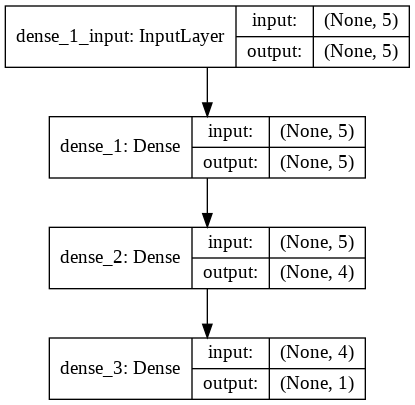

In [21]:
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True)

In [22]:
results = model.evaluate(training_set_scaled, target_set)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i]," : ", results[i])

58/58 [==============================] - 0s 62us/step
loss  :  0.002929601280404062
mean_absolute_percentage_error  :  5.956605434417725


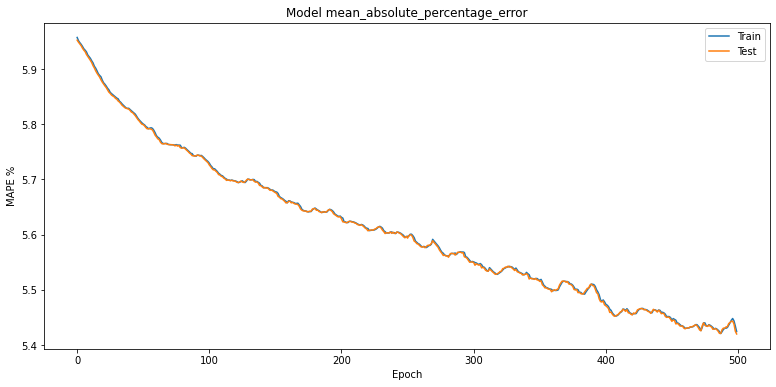

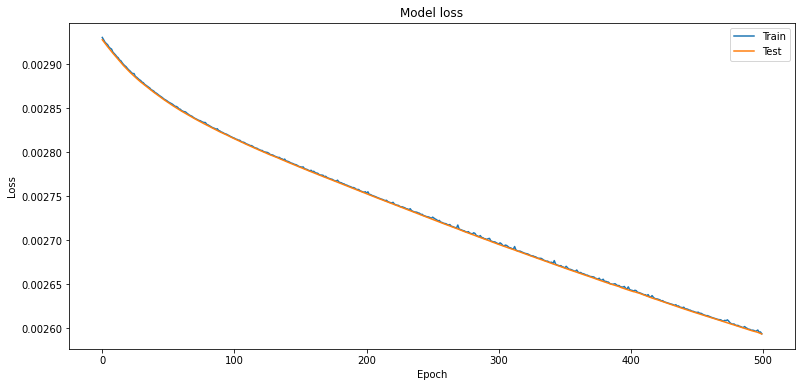

In [23]:
history = model.fit(training_set_scaled, target_set, batch_size=32, epochs=500,validation_data=(training_set_scaled,target_set), verbose=0)
# Plot training & validation accuracy values
plt.figure(figsize=(13,6))
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# **Analisis de importancia de Variables**

In [65]:
def Evaluador(dataset, name):
   sc = MinMaxScaler(feature_range = (0, 1))
   dataset = sc.fit_transform(dataset)

   dataset0 = model.predict(dataset)

   conclusion = np.append(dataset,dataset0, axis=1)
   pd.DataFrame(conclusion).to_csv(name + "dataset.csv")
   lector = pd.read_csv(name +"dataset.csv")
   del lector['Unnamed: 0']
   pd.DataFrame(lector).to_csv(name +"dataset.csv")
   return lector


   




Evaluacion de la importancia de la footprint

In [66]:
footprint = pd.read_csv('footprint.csv')
foot1 = 'foot1'

footprint

,70,30,0.1,15,0.8
0,70,30,0.1,14,0.8
1,70,30,0.1,13,0.8
2,70,30,0.1,12,0.8
3,70,30,0.1,11,0.8
4,70,30,0.1,10,0.8
5,70,30,0.1,9,0.8
6,70,30,0.1,8,0.8
7,70,30,0.1,7,0.8
8,70,30,0.1,6,0.8
9,70,30,0.1,5,0.8


In [67]:
Evaluador(footprint, foot1)

,0,1,2,3,4,5
0,0.0,0.0,0.0,1.000000,0.0,0.601476
1,0.0,0.0,0.0,0.965517,0.0,0.599961
2,0.0,0.0,0.0,0.931034,0.0,0.598446
3,0.0,0.0,0.0,0.896552,0.0,0.596930
4,0.0,0.0,0.0,0.862069,0.0,0.595415
5,0.0,0.0,0.0,0.827586,0.0,0.593900
6,0.0,0.0,0.0,0.793103,0.0,0.592385
7,0.0,0.0,0.0,0.758621,0.0,0.590870
8,0.0,0.0,0.0,0.724138,0.0,0.589354
9,0.0,0.0,0.0,0.689655,0.0,0.587839


Importancia de la libertad

In [68]:
libertad = pd.read_csv('fredoom.csv')
liber = 'libertad_economica'

In [69]:
Evaluador(libertad, liber)

,0,1,2,3,4,5
0,1.000000,0.0,0.0,0.0,0.0,0.699853
1,0.965517,0.0,0.0,0.0,0.0,0.694946
2,0.931034,0.0,0.0,0.0,0.0,0.690038
3,0.896552,0.0,0.0,0.0,0.0,0.685131
4,0.862069,0.0,0.0,0.0,0.0,0.680223
5,0.827586,0.0,0.0,0.0,0.0,0.675316
6,0.793103,0.0,0.0,0.0,0.0,0.670408
7,0.758621,0.0,0.0,0.0,0.0,0.665501
8,0.724138,0.0,0.0,0.0,0.0,0.660593
9,0.689655,0.0,0.0,0.0,0.0,0.655686


Importancia del Capital Humano

In [71]:
hc = pd.read_csv('humancapital.csv')
hc0 = 'HumanCapitalConclusion'

In [72]:
Evaluador(hc, hc0)

,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,1.0,0.814484
1,0.0,0.0,0.0,0.0,1.0,0.814484
2,0.0,0.0,0.0,0.0,1.0,0.814484
3,0.0,0.0,0.0,0.0,0.5,0.686010
4,0.0,0.0,0.0,0.0,0.5,0.686010
5,0.0,0.0,0.0,0.0,0.5,0.686010
6,0.0,0.0,0.0,0.0,0.5,0.686010
7,0.0,0.0,0.0,0.0,0.0,0.557535
8,0.0,0.0,0.0,0.0,0.0,0.557535
9,0.0,0.0,0.0,0.0,0.0,0.557535


Importancia Coefficiente De Gini

In [73]:
gc = pd.read_csv('GiniCoefficient.csv')
gc0 = 'GiniCoefficientImportance'

In [74]:
Evaluador(gc, gc0)

,0,1,2,3,4,5
0,0.0,1.0,0.0,0.0,0.0,0.582858
1,0.0,0.9,0.0,0.0,0.0,0.580388
2,0.0,0.8,0.0,0.0,0.0,0.577919
3,0.0,0.7,0.0,0.0,0.0,0.575449
4,0.0,0.6,0.0,0.0,0.0,0.573006
5,0.0,0.5,0.0,0.0,0.0,0.570569
6,0.0,0.4,0.0,0.0,0.0,0.568133
7,0.0,0.3,0.0,0.0,0.0,0.565696
8,0.0,0.2,0.0,0.0,0.0,0.563112
9,0.0,0.1,0.0,0.0,0.0,0.560323


Importancia de la Igualdad de Genero

In [75]:
gi = pd.read_csv('GenderInequality.csv')
gi0 = 'GenderInequalityConclusion'

In [76]:
Evaluador(gi, gi0)

,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,0.0,0.557535
1,0.0,0.0,0.1,0.0,0.0,0.549436
2,0.0,0.0,0.2,0.0,0.0,0.541338
3,0.0,0.0,0.3,0.0,0.0,0.533239
4,0.0,0.0,0.4,0.0,0.0,0.525140
5,0.0,0.0,0.5,0.0,0.0,0.517042
6,0.0,0.0,0.6,0.0,0.0,0.508943
7,0.0,0.0,0.7,0.0,0.0,0.500844
8,0.0,0.0,0.8,0.0,0.0,0.492746
9,0.0,0.0,0.9,0.0,0.0,0.484647
